In [1]:
from etherscanTools import EtherscanTools
import pandas as pd
from pandasgui import show
from opensea import OpenseaAPI

api_key = 'VEQSPWESY5P3P9AZSUQ7J6C89HUZHZ5BM5'
wallet_address = '0x96245791FEE4DC3c85045c5eeD425c488BD02E67'

etherscanTools = EtherscanTools(api_key, wallet_address)
opensea = OpenseaAPI()

In [2]:
deadheads_address = '0x6fc355d4e0ee44b292e50878f49798ff755a5bbc'
token_id = "4444"
result = opensea.asset(asset_contract_address=deadheads_address, token_id=token_id)

ConnectionError: The server blocked access.

In [ ]:
opensea.collection_stats(collection_slug='deadheads')['stats']['floor_price']

0.15

In [ ]:
opensea.collection_stats(collection_slug='veefriends')['stats']['floor_price']

9.0

In [ ]:
addresses = etherscanTools.get_all_erc721_contract_addresses()

0     0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb
1     0xf3e778f839934fc819cfa1040aabacecba01e049
2     0x2d0ee46b804f415be4dc8aa1040834f5125ebd2e
3     0xe6ef513f7429d92cb54ebd4c14026aeb90849a78
11    0x1dcbc2a155fc62b8efa84d2759b23f29b0c7a335
Name: contractAddress, dtype: object


In [ ]:
owned_tokens = opensea.assets(owner=wallet_address)
for nft in owned_tokens['assets']:
    print(nft['name'])

Merry Modz #5950
Merry Modz #5949
Merry Modz #5948
Merry Modz #5947
Merry Modz #5946
Merry Modz #1309
Merry Modz #1308
Merry Modz #1307
ITFK Heroic 09755
ITFK Relentless 07698
ITFK Relentless 18718
ITFK Relentless 13436
ITFK Relentless 03530
ITFK Relentless 09649
ITFK Heroic 07476
ITFK Legendary 05024
Dapper Dino #4767
Avastar #22082
Wise Wasp


In [ ]:
from urllib import request
from PIL import Image

def get_100px_imgs_from_opensea_assets(tokens):
    imgs = []
    for token in tokens['assets']:
        try:
            img_url = request.urlopen(token['image_original_url'])
        except:
            img_url = request.urlopen(token['image_url'])
        img = Image.open(img_url)
        img_size = img.size
        img_aspect_ratio = img_size[0] / img_size[1]
        imgs.append(img.resize((int(img_aspect_ratio*100),100)))
    return imgs

In [ ]:
nft_images = get_100px_imgs_from_opensea_assets(owned_tokens)

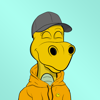

In [ ]:
# for image in nft_images:
nft_images[-3]

In [ ]:
def get_floor_prices_from_opensea_assets(tokens):
    floor_prices = []
    for token in tokens['assets']:
        slug = token['collection']['slug']
        stats = opensea.collection_stats(collection_slug=slug)['stats']
        floor_prices.append(stats['floor_price'])
    return floor_prices

In [ ]:
get_floor_prices_from_opensea_assets(owned_tokens)

[0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.18,
 0.078,
 9.0]

In [ ]:
owned_tokens

{'assets': [{'id': 107077804,
   'token_id': '5950',
   'num_sales': 0,
   'background_color': None,
   'image_url': 'https://lh3.googleusercontent.com/_JpXAT-vXjYATHqBkaY40g7azt8-9s_ZSE1ohrrD3BrY4JC0T_FXjOCLhIIranf-Gr8w_txY9zMrDlSbZhk90YzjTiF52dHvvjmX7Vc',
   'image_preview_url': 'https://lh3.googleusercontent.com/_JpXAT-vXjYATHqBkaY40g7azt8-9s_ZSE1ohrrD3BrY4JC0T_FXjOCLhIIranf-Gr8w_txY9zMrDlSbZhk90YzjTiF52dHvvjmX7Vc=s250',
   'image_thumbnail_url': 'https://lh3.googleusercontent.com/_JpXAT-vXjYATHqBkaY40g7azt8-9s_ZSE1ohrrD3BrY4JC0T_FXjOCLhIIranf-Gr8w_txY9zMrDlSbZhk90YzjTiF52dHvvjmX7Vc=s128',
   'image_original_url': 'https://storage.googleapis.com/7981b604-d28c-4982-ac3f-0f9c61dc6e1d/3637.0001.png',
   'animation_url': None,
   'animation_original_url': None,
   'name': 'Merry Modz #5950',
   'description': None,
   'external_link': None,
   'asset_contract': {'address': '0x1dcbc2a155fc62b8efa84d2759b23f29b0c7a335',
    'asset_contract_type': 'non-fungible',
    'created_date': '2021-

In [ ]:
show(etherscanTools.get_erc721_txn_history_dataframe())